In [1]:
import pandas as pd
from sklearn import linear_model

In [2]:
df = pd.DataFrame({'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC', 'Seattle', 'Seattle', 'Seattle'],
                   'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]})
df

,City,Rent
0,SF,3999
1,SF,4000
2,SF,4001
3,NYC,3499
4,NYC,3500
5,NYC,3501
6,Seattle,2499
7,Seattle,2500
8,Seattle,2501


**Una variable categórica,** como sugiere su nombre, se utiliza para representar categorías o etiquetas. Por ejemplo, una variable categórica podría representar las principales ciudades del mundo, las cuatro estaciones del año o la industria (petróleo, viajes, tecnología) de una empresa. El número de valores de categoría siempre es finito en un conjunto de datos del mundo real. Los valores pueden representarse numéricamente. Sin embargo, a diferencia de otras variables numéricas, **los valores de una variable categórica no se pueden ordenar entre sí.** (El petróleo no es ni mayor ni menor que los viajes como tipo de industria). Se denominan no ordinales.

Una simple pregunta puede servir como prueba de fuego para saber si algo debe ser una variable categórica: "¿Importa cuán diferentes son dos valores, o solo que son diferentes?" El precio de una acción de 500 USD es cinco veces más alto que el precio de 100 USD. Entonces, el precio de las acciones debe estar representado por una variable numérica continua. La industria de la empresa (petróleo, viajes, tecnología, etc.), por otro lado, probablemente debería ser categórica.

Las variables categóricas grandes son particularmente comunes en los registros transaccionales. Por ejemplo, muchos servicios web rastrean a los usuarios mediante una identificación, que es una variable categórica con cientos a cientos de millones de valores, según la cantidad de usuarios únicos del servicio. La dirección IP de una transacción de Internet es otro ejemplo de una gran variable categórica. Son variables categóricas porque, aunque los ID de usuario y las direcciones IP son numéricos, su magnitud generalmente no es relevante para la tarea en cuestión. Por ejemplo, la dirección IP puede ser relevante al realizar la detección de fraude en transacciones individuales: algunas direcciones IP o subredes pueden generar más transacciones fraudulentas que otras. Pero una subred de 164.203.x.x no es inherentemente más fraudulenta que 164.202.x.x; el valor numérico de la subred no importa.

El vocabulario de un corpus de documentos se puede interpretar como una gran variable categórica, siendo las categorías palabras únicas. Puede ser computacionalmente costoso representar tantas categorías distintas. Si una categoría (por ejemplo, una palabra) aparece varias veces en un punto de datos (documento), podemos representarla como un recuento y representar todas las categorías a través de sus estadísticas de recuento. Esto se llama conteo de contenedores. Comenzamos esta discusión con representaciones comunes de variables categóricas y, finalmente, serpenteamos hacia una discusión sobre el conteo de bins para variables categóricas grandes, que son muy comunes en los conjuntos de datos modernos.

# Encoding Categorical Variables

Las categorías de una variable categórica no suelen ser numéricas. Por ejemplo, el color de los ojos puede ser "negro", "azul", "marrón", etc. Por lo tanto, se necesita un método de codificación para convertir estas categorías no numéricas en números. Es tentador simplemente asignar un número entero, digamos del 1 al k, a cada una de las k categorías posibles, pero los valores resultantes podrían ordenarse entre sí, lo que no debería ser permisible para las categorías.

- Dummy Coding
- One-Hot Encoding

Utilizar un grupo de bits

In [3]:
one_hot_df = pd.get_dummies(df, prefix=['city'])

one_hot_df

,Rent,city_NYC,city_SF,city_Seattle
0,3999,0,1,0
1,4000,0,1,0
2,4001,0,1,0
3,3499,1,0,0
4,3500,1,0,0
5,3501,1,0,0
6,2499,0,0,1
7,2500,0,0,1
8,2501,0,0,1


In [4]:
lin_reg = linear_model.LinearRegression()

In [5]:
lin_reg.fit(one_hot_df[['city_NYC', 'city_SF', 'city_Seattle']], one_hot_df['Rent'])

LinearRegression()

In [6]:
lin_reg.coef_

array([ 166.66666667,  666.66666667, -833.33333333])

In [7]:
lin_reg.intercept_

3333.3333333333335

In [8]:
# One-hot encoding weights + intercept
w1 = lin_reg.coef_
b1 = lin_reg.intercept_

In [9]:
df['Rent'].mean()

3333.3333333333335

In [10]:
dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True)
dummy_df

,Rent,city_SF,city_Seattle
0,3999,1,0
1,4000,1,0
2,4001,1,0
3,3499,0,0
4,3500,0,0
5,3501,0,0
6,2499,0,1
7,2500,0,1
8,2501,0,1


In [11]:
lin_reg.fit(dummy_df[['city_SF', 'city_Seattle']], dummy_df['Rent'])

LinearRegression()

In [12]:
lin_reg.coef_

array([  500., -1000.])

In [13]:
lin_reg.intercept_

3500.0

In [14]:
# Dummy coding weights + intercept
w2 = lin_reg.coef_
b2 = lin_reg.intercept_

In [15]:
effect_df = dummy_df.copy()

In [16]:
effect_df.loc[3:5, ['city_SF', 'city_Seattle']] = -1.0
effect_df

,Rent,city_SF,city_Seattle
0,3999,1.0,0.0
1,4000,1.0,0.0
2,4001,1.0,0.0
3,3499,-1.0,-1.0
4,3500,-1.0,-1.0
5,3501,-1.0,-1.0
6,2499,0.0,1.0
7,2500,0.0,1.0
8,2501,0.0,1.0


In [17]:
lin_reg.fit(effect_df[['city_SF', 'city_Seattle']], effect_df['Rent'])
lin_reg.coef_

array([ 666.66666667, -833.33333333])

In [18]:
lin_reg.intercept_

3333.3333333333335

In [19]:
# illustration of rental price in cities
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4, color_codes=True)

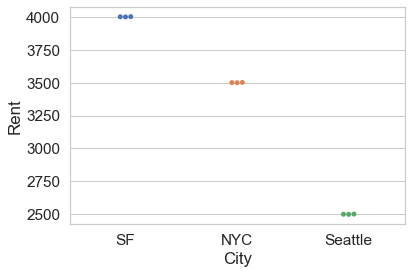

In [20]:
sns.swarmplot(x="City", y="Rent", data=df);

In [21]:
print('One-hot encoding weights: ' ,w1, ' and intercept: ', b1)
print('Dummy encoding weights: ' ,w2, ' and intercept: ', b2)

One-hot encoding weights:  [ 166.66666667  666.66666667 -833.33333333]  and intercept:  3333.3333333333335
Dummy encoding weights:  [  500. -1000.]  and intercept:  3500.0


In [22]:
# geometry of one-hot vs. dummy encoding

# Create a list of values in the best fit line for one-hot encoding
one_hot_y = [((w1[0] * one_hot_df.city_NYC[i]) + 
              (w1[1] * one_hot_df.city_SF[i]) +
              (w1[2] * one_hot_df.city_Seattle[i]) + b1) 
             for i in range(0,one_hot_df.shape[0])]

# Create a list of values in the best fit line for dummy coding
dummy_y = [((w2[0] * dummy_df.city_SF[i]) +
            (w2[1] * dummy_df.city_Seattle[i]) + b2)
           for i in range(0,dummy_df.shape[0])]

print(one_hot_y)
print(dummy_y)

[4000.0000000000005, 4000.0000000000005, 4000.0000000000005, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0]
[3999.9999999999995, 3999.9999999999995, 3999.9999999999995, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0]
